## Import Data
Pada tahap ini, saya mengimpor pustaka yang diperlukan seperti pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta KMeans dari sklearn untuk segmentasi. Kemudian, saya memuat data dari file CSV dan menampilkan beberapa baris pertama untuk memeriksa struktur data.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load the data
file_path = 'user-demographics.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataframe
data.head()

,Town/City,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
0,Hyderabad,India,75090,71123,81835,0.560468,1.089826,132.499694,758313
1,Bengaluru,India,74325,72162,84798,0.536459,1.140908,138.728988,776356
2,Chennai,India,54031,51207,55398,0.576372,1.025300,120.585664,511249
3,Mumbai,India,48323,45147,43751,0.483714,0.905387,103.302547,422074
4,Pune,India,44515,41678,45887,0.531401,1.030821,119.913759,420101


## Eksplorasi Data
Pada tahap eksplorasi data, saya melihat statistik ringkasan dari dataset dan memeriksa apakah ada nilai yang hilang. Saya juga membuat visualisasi distribusi jumlah pengguna di berbagai kota untuk mendapatkan gambaran awal.

In [4]:
# Summary statistics
data.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,258.603400,239.222400,244.537000,0.523479,0.853167,101.298684,2276.547400
std,2188.601568,2066.505792,2296.886373,0.121147,0.406458,173.481918,21224.330334
min,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,19.000000,17.000000,15.000000,0.450525,0.670073,47.175600,128.000000
50%,33.000000,29.000000,28.000000,0.525000,0.823529,77.371173,250.000000
75%,84.000000,77.000000,73.000000,0.600000,0.983146,119.423881,689.250000
max,75090.000000,72162.000000,84798.000000,1.000000,13.294118,6895.550000,776356.000000


In [5]:
# Checking for missing values
data.isnull().sum()

,0
Town/City,0
Country,0
Users,0
New users,0
Engaged sessions,0
Engagement rate,0
Engaged sessions per user,0
Average engagement time,0
Event count,0


In [7]:
# Sort data by number of users
data_sorted = data.sort_values(by='Users', ascending=False)

In [8]:
# Select top 20 cities with the highest number of users
top_cities = data_sorted.head(20)

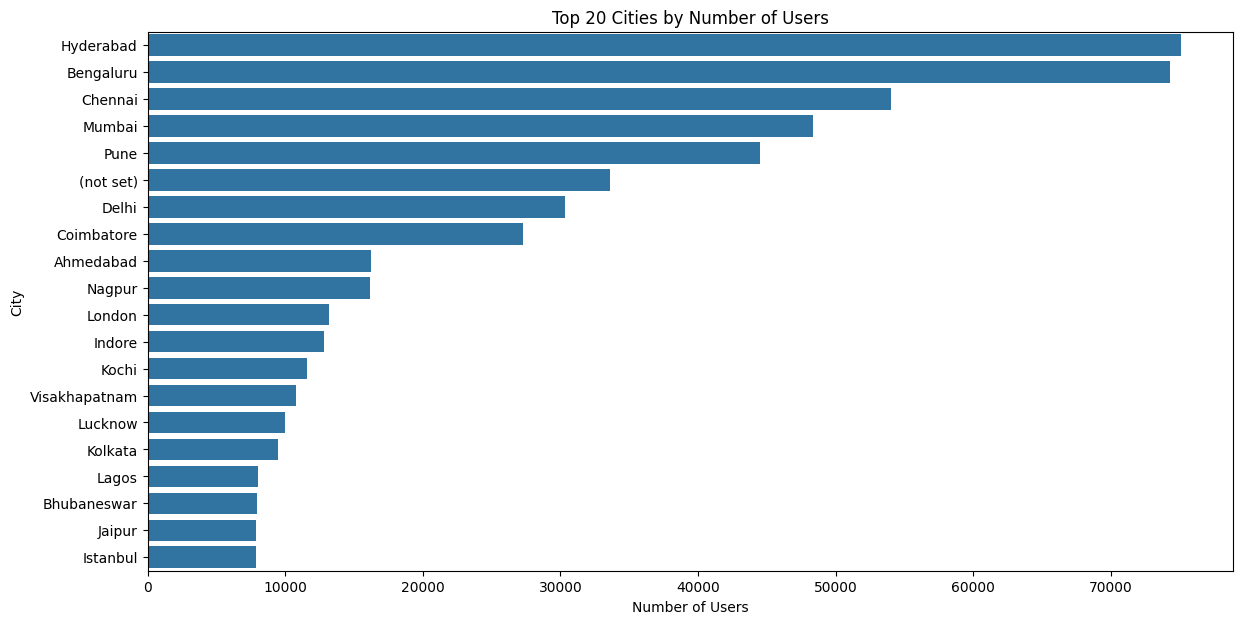

In [9]:
# Plot the distribution of users in the top 20 cities
plt.figure(figsize=(14, 7))
sns.barplot(x='Users', y='Town/City', data=top_cities)
plt.title('Top 20 Cities by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('City')
plt.show()

## Analisis Keterlibatan
Analisis ini membandingkan berbagai metrik keterlibatan di berbagai kota. Dengan melihat metrik seperti sesi terlibat, tingkat keterlibatan, sesi terlibat per pengguna, dan waktu keterlibatan rata-rata, saya dapat mengidentifikasi kota mana yang memiliki keterlibatan pengguna tertinggi dan terendah.

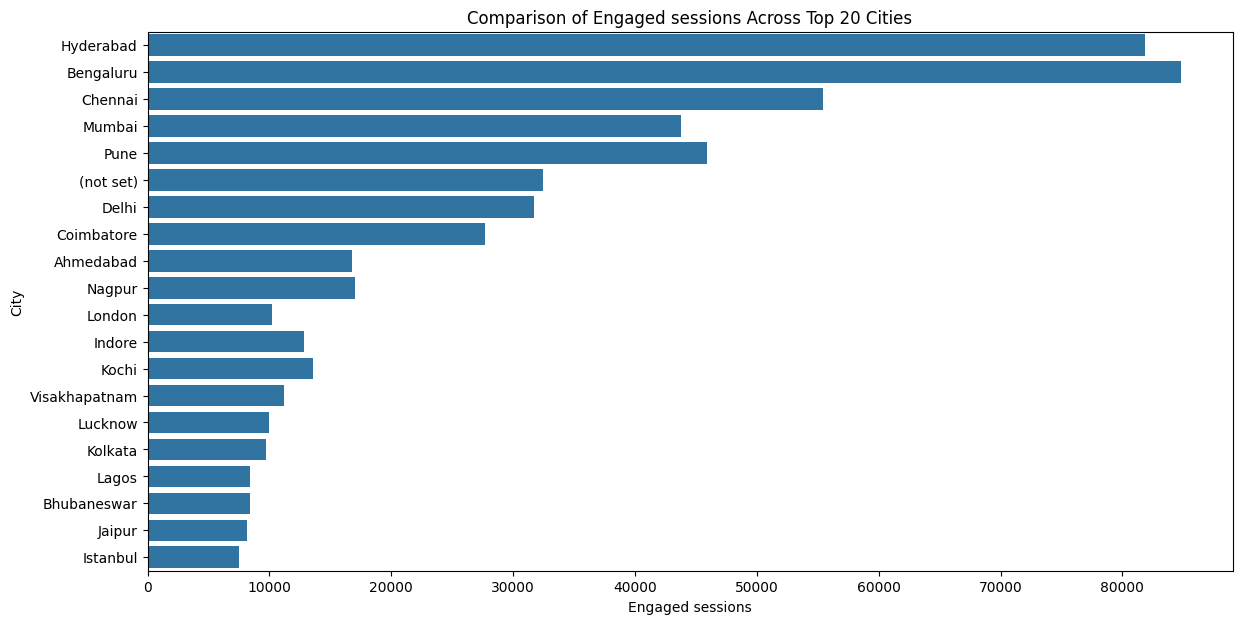

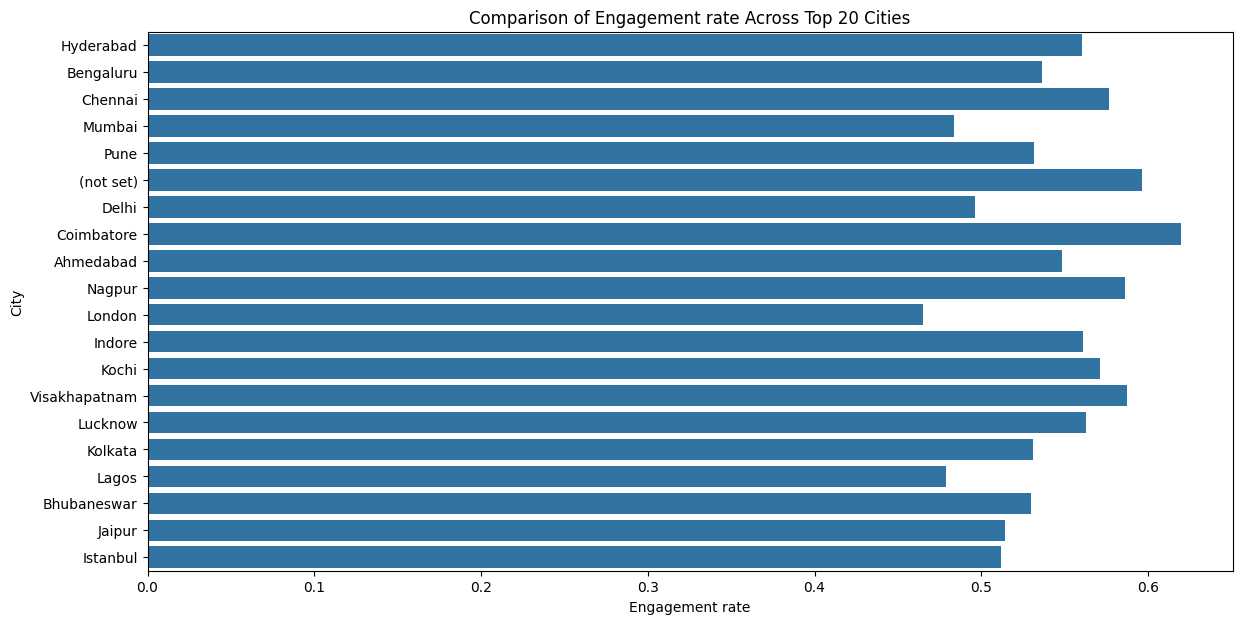

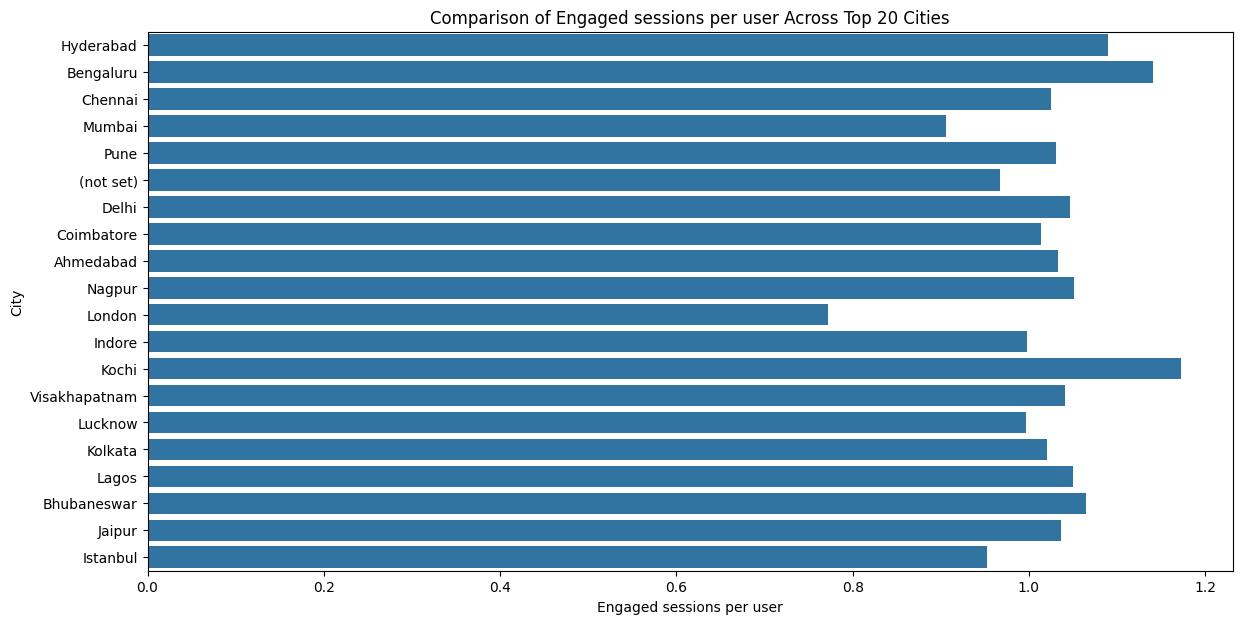

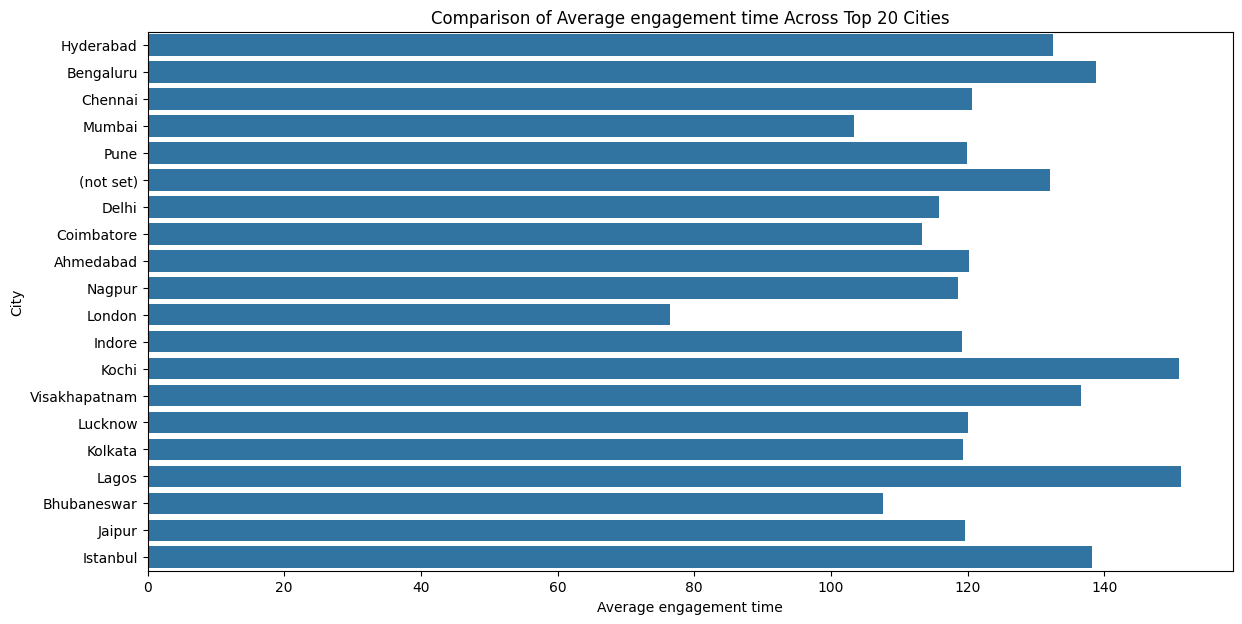

In [11]:
# Engagement metrics comparison
metrics = ['Engaged sessions', 'Engagement rate', 'Engaged sessions per user', 'Average engagement time']

for metric in metrics:
    plt.figure(figsize=(14, 7))
    sns.barplot(x=metric, y='Town/City', data=top_cities)
    plt.title(f'Comparison of {metric} Across Top 20 Cities')
    plt.xlabel(metric)
    plt.ylabel('City')
    plt.show()

## Analisis Pengguna Baru vs Pengguna Kembali
Tahap ini fokus pada perbandingan pengguna baru dengan pengguna yang kembali di berbagai kota. Dengan menghitung proporsi pengguna baru, saya dapat mengidentifikasi kota mana yang memiliki proporsi pengguna baru tertinggi, yang bisa menjadi target utama untuk kampanye pemasaran.

In [12]:
# Calculate the proportion of new users
top_cities['New user proportion'] = top_cities['New users'] / top_cities['Users']

<ipython-input-12-843574ea9f6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities['New user proportion'] = top_cities['New users'] / top_cities['Users']


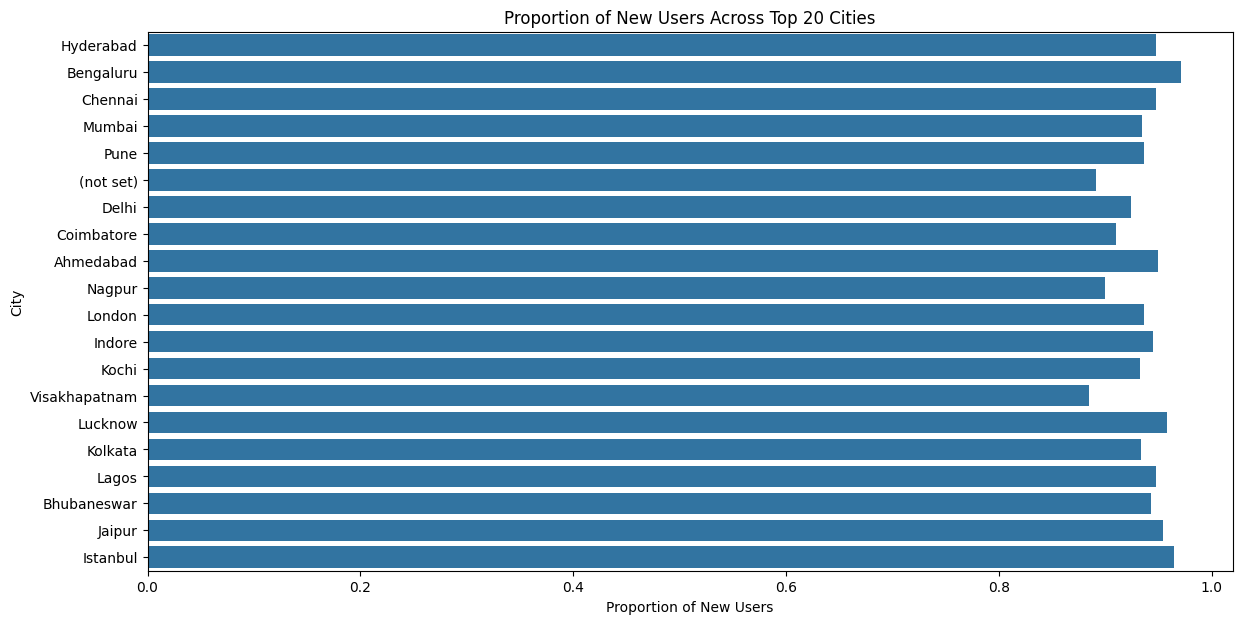

In [13]:
# Plot the proportion of new users
plt.figure(figsize=(14, 7))
sns.barplot(x='New user proportion', y='Town/City', data=top_cities)
plt.title('Proportion of New Users Across Top 20 Cities')
plt.xlabel('Proportion of New Users')
plt.ylabel('City')
plt.show()

## Segmentasi Pengguna
Segmentasi pengguna dilakukan dengan menggunakan algoritma K-means clustering pada 20 kota teratas. Saya memilih fitur yang relevan untuk clustering dan menentukan 4 segmen. Visualisasi scatter plot digunakan untuk menggambarkan hasil clustering berdasarkan jumlah pengguna dan tingkat keterlibatan.

In [14]:
# Select relevant features for clustering
features = top_cities[['Users', 'New users', 'Engaged sessions', 'Engagement rate', 'Engaged sessions per user', 'Average engagement time']]

In [15]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
top_cities['Segment'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-15-bdb9f452a845>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_cities['Segment'] = kmeans.fit_predict(features)


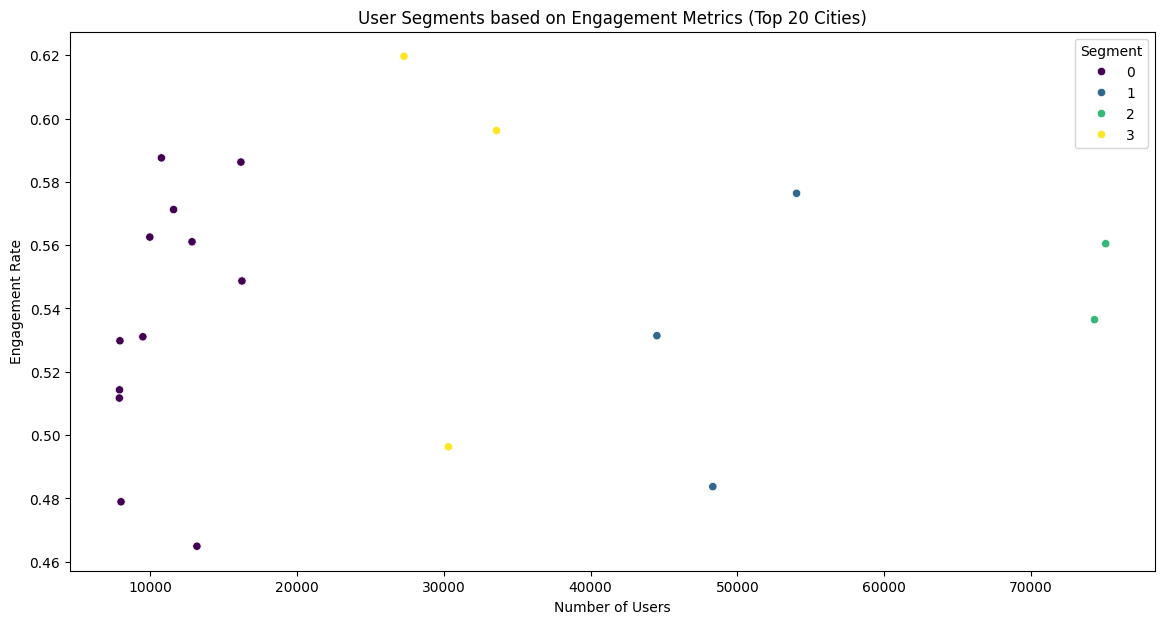

In [16]:
# Plot the clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Users', y='Engagement rate', hue='Segment', data=top_cities, palette='viridis')
plt.title('User Segments based on Engagement Metrics (Top 20 Cities)')
plt.xlabel('Number of Users')
plt.ylabel('Engagement Rate')
plt.legend(title='Segment')
plt.show()

## Kesimpulan
Berdasarkan analisis data demografi pengguna, berikut adalah temuan dan kesimpulan yang dapat diambil:

1. Karakteristik dan Perilaku Pengguna dari Berbagai Kota:

- Kota-kota seperti Hyderabad dan Bengaluru memiliki jumlah pengguna tertinggi.
- Kota dengan jumlah pengguna yang lebih rendah seperti Pune dan Chennai mungkin memerlukan strategi pemasaran yang lebih agresif.

2. Variasi Metrik Keterlibatan di Berbagai Kota:

- Bengaluru menunjukkan jumlah sesi terlibat yang tinggi.
- Mumbai memiliki sesi terlibat yang lebih rendah.
- Tingkat keterlibatan di Chennai lebih tinggi dibandingkan dengan Mumbai.
- Bengaluru dan Hyderabad menunjukkan sesi terlibat per pengguna yang tinggi.
- Waktu keterlibatan rata-rata di Bengaluru dan Hyderabad lebih tinggi.

3. Proporsi Pengguna Baru vs Pengguna Kembali:

- Hyderabad dan Bengaluru menunjukkan proporsi pengguna baru yang tinggi.

4. Segmentasi Pengguna untuk Optimalisasi Penargetan Iklan dan Alokasi Anggaran:

- Segmen pengguna dengan rata-rata pengguna dan tingkat keterlibatan yang rendah membutuhkan kampanye pemasaran yang lebih intensif.
- Segmen dengan tingkat keterlibatan tinggi tetapi jumlah pengguna yang lebih rendah harus difokuskan pada peningkatan jumlah pengguna.
- Segmen dengan tingkat keterlibatan yang sangat tinggi dan jumlah pengguna yang tinggi harus dipertahankan dengan strategi yang ada.
- Segmen pengguna baru dengan tingkat keterlibatan moderat harus difokuskan pada strategi retensi untuk meningkatkan keterlibatan dan mengubah pengguna baru menjadi pengguna aktif yang kembali.

## Rekomendasi
1. Strategi Pemasaran Berbasis Kota:

- Tingkatkan kampanye pemasaran di kota-kota dengan jumlah pengguna rendah untuk meningkatkan adopsi platform.
- Fokus pada kota dengan tingkat keterlibatan rendah untuk meningkatkan interaksi pengguna dengan platform.

2. Peningkatan Konten dan Fitur:

- Kembangkan konten yang lebih menarik dan fitur-fitur baru yang dapat meningkatkan keterlibatan di kota-kota dengan sesi terlibat per pengguna yang rendah.
- Pertimbangkan untuk menambahkan fitur yang disesuaikan dengan preferensi pengguna di kota dengan keterlibatan rendah untuk meningkatkan waktu yang dihabiskan di platform.

3. Optimalisasi Anggaran Iklan:

- Alokasikan anggaran iklan secara efisien dengan fokus pada segmen pengguna yang menunjukkan potensi keterlibatan tinggi dan pertumbuhan pengguna.
- Pertimbangkan untuk mengalokasikan lebih banyak sumber daya ke kota dengan proporsi pengguna baru yang tinggi untuk memaksimalkan akuisisi pengguna baru.

4. Strategi Retensi Pengguna Baru:

- Implementasikan strategi yang efektif untuk meningkatkan retensi pengguna baru, khususnya di kota-kota dengan proporsi pengguna baru yang tinggi.
- Berikan insentif seperti konten eksklusif atau penawaran khusus untuk mendorong pengguna baru menjadi pengguna yang kembali secara teratur.

5. Pengembangan Pengguna Aktif:

- Fokus pada meningkatkan jumlah sesi terlibat per pengguna dan waktu keterlibatan rata-rata di kota dengan tingkat keterlibatan rendah.
- Kembangkan program keterlibatan seperti kampanye gamifikasi atau komunitas pengguna untuk meningkatkan interaksi pengguna dengan platform.

## Penutup
Dengan analisis demografi dan segmentasi pengguna yang telah dilakukan, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif dan efisien. Pendekatan berbasis data ini memungkinkan perusahaan untuk mengoptimalkan penargetan iklan dan alokasi anggaran guna mencapai keterlibatan dan konversi yang maksimal. Proyek ini memberikan panduan yang jelas dan terperinci untuk mengoptimalkan penargetan iklan dan alokasi anggaran berdasarkan data demografi pengguna.